In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [206]:
########## SQ strategy

In [207]:
SQ = pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022.csv', low_memory=False)

In [208]:
#grouped_trips

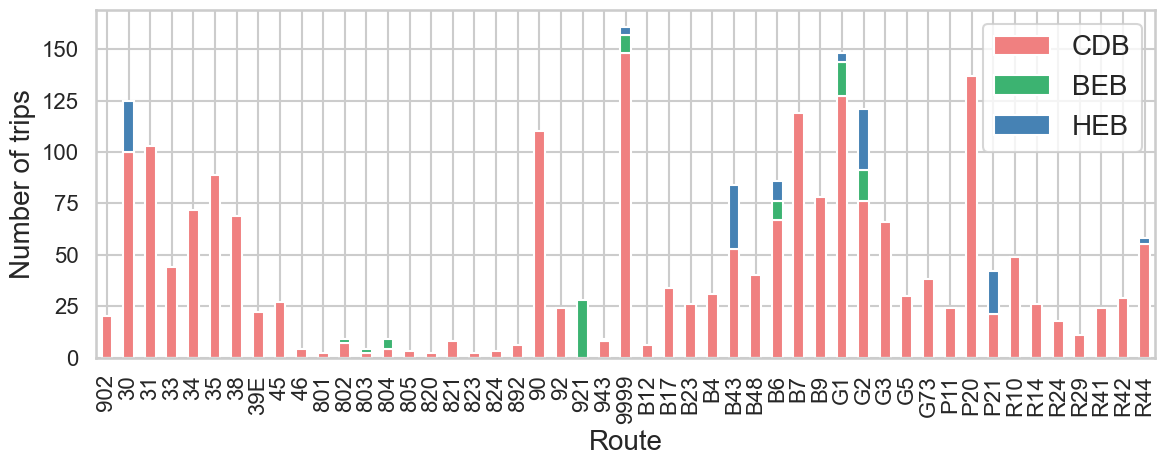

In [209]:
# Filter the dataframe for date 2021-10-29
SQ_filtered = SQ.loc[SQ['Date']=='2021-10-29'].copy()

# Remove X and (X) from routes names
SQ_filtered['Route'] = SQ_filtered['Route'].str.replace(r'\(X\)', '', regex=True) # replace (X)
SQ_filtered['Route'] = SQ_filtered['Route'].str.replace('X', '', regex=False) # replace X

# Group by Route and Powertrain to count unique trips
grouped_trips = SQ_filtered.groupby(['Route', 'Powertrain'])['Trip'].nunique().unstack(fill_value=0)

# Rename columns
grouped_trips = grouped_trips.rename(columns={
    'conventional': 'CDB',
    'hybrid': 'HEB',
    'electric': 'BEB'
})


# Plot
# Create a figure and a set of subplots with larger size
fig, ax = plt.subplots(figsize=(12, 5))

colors = {'CDB': 'lightcoral', 'HEB': 'steelblue', 'BEB': 'mediumseagreen'}
ax = grouped_trips.plot(kind='bar', stacked=True, color=[colors[col] for col in grouped_trips.columns], ax=ax)

# Annotate with BEB percentages
for index, (route, row) in enumerate(grouped_trips.iterrows()):
    total = row.sum()
    BEB_count = row.get('BEB', 0)
    percentage = (BEB_count / total) * 100
    
# Set the title and labels with larger font sizes
ax.set_xlabel('Route', fontsize=20)
ax.set_ylabel('Number of trips', fontsize=20)
ax.legend(fontsize=20)
#ax.set_xlabel('')
#ax.set_xticks([])
# Increase the font size for tick labels
ax.tick_params(axis='both', labelsize=16)

plt.tight_layout()

fig.savefig(r'../../figures/SQ_route_electrification.png', dpi=400)  

plt.show()


In [45]:
# Compute the total BEB counts and total trips
total_BEB_counts = grouped_trips['BEB'].sum()
total_trips = grouped_trips.sum(axis=1).sum()

# Calculate average %BEB across all routes
average_percentage_BEB = (total_BEB_counts / total_trips) * 100

print(f"Average %BEB across all routes: {average_percentage_BEB:.2f}%")


Average %BEB across all routes: 3.82%


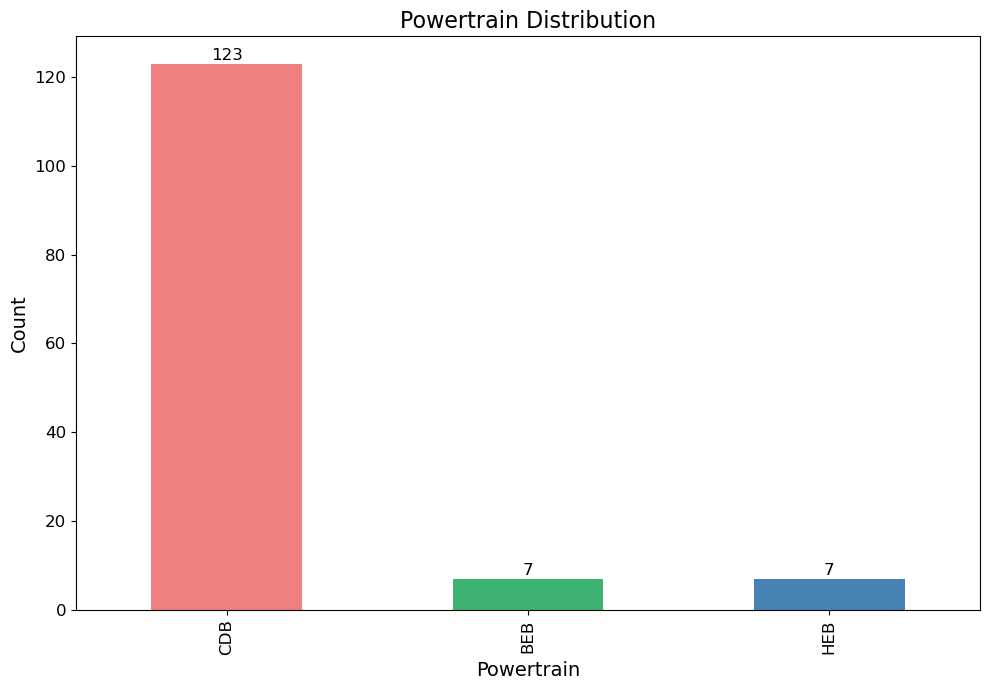

In [46]:
# Drop duplicate Vehicles while retaining the associated Powertrain
unique_vehicles = SQ_filtered.drop_duplicates(subset='Vehicle', keep='first')

# Count occurrences of each Powertrain
powertrain_counts = unique_vehicles['Powertrain'].value_counts()

# Define colors
colors = {'conventional': 'lightcoral', 'hybrid': 'steelblue', 'electric': 'mediumseagreen'}

# Create a larger plot with increased font size
plt.figure(figsize=(10,7))
ax = powertrain_counts.plot(kind='bar', color=[colors[p] for p in powertrain_counts.index])

# Annotate bars with their count
for i, v in enumerate(powertrain_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=12)

# Labels, title, and formatting
plt.xlabel('Powertrain', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Powertrain Distribution', fontsize=16)
labels = {'conventional': 'CDB', 'hybrid': 'HEB', 'electric': 'BEB'}
plt.xticks(range(len(powertrain_counts.index)), [labels[p] for p in powertrain_counts.index], fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

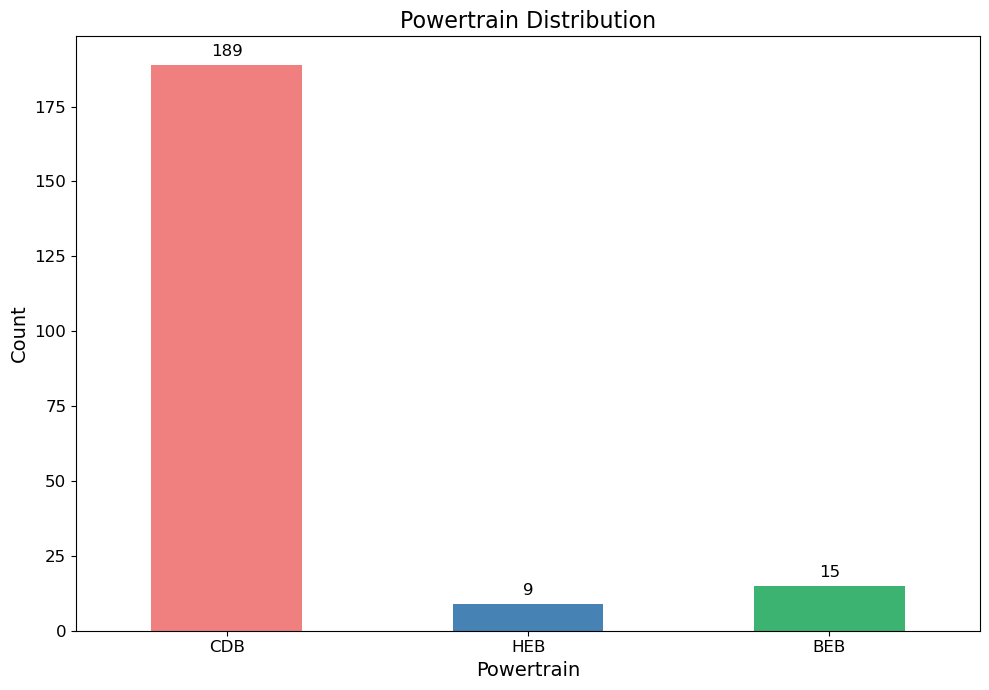

In [47]:
# Define counts and their labels
powertrain_counts = pd.Series({'conventional': 189, 'hybrid': 9, 'electric': 15})

# Define colors
colors = {'conventional': 'lightcoral', 'hybrid': 'steelblue', 'electric': 'mediumseagreen'}

# Create a larger plot with increased font size
plt.figure(figsize=(10,7))
ax = powertrain_counts.plot(kind='bar', color=[colors[p] for p in powertrain_counts.index])

# Annotate bars with their count
for i, v in enumerate(powertrain_counts):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=12)  # increased y-value a bit for better placement

# Labels, title, and formatting
plt.xlabel('Powertrain', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Powertrain Distribution', fontsize=16)
labels = {'conventional': 'CDB', 'hybrid': 'HEB', 'electric': 'BEB'}
plt.xticks(range(len(powertrain_counts.index)), [labels[p] for p in powertrain_counts.index], fontsize=12, rotation=0)  # set rotation to 0
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

In [ ]:
# Calculate sum for each Year for each DataFrame
h_FH_variables['Result'] = h_FH_variables['Value'] * h_FH_variables['Coefficient']
h_FH_sum = h_FH_variables.groupby('Year')['Result'].sum().reset_index()

m_FH_variables['Result'] = m_FH_variables['Value'] * m_FH_variables['Coefficient']
m_FH_sum = m_FH_variables.groupby('Year')['Result'].sum().reset_index()

l_FH_variables['Result'] = l_FH_variables['Value'] * l_FH_variables['Coefficient']
l_FH_sum = l_FH_variables.groupby('Year')['Result'].sum().reset_index()

# Add Scenario and Strategy columns
h_FH_sum['Scenario'] = 'h'
h_FH_sum['Strategy'] = 'FH'

m_FH_sum['Scenario'] = 'm'
m_FH_sum['Strategy'] = 'FH'

l_FH_sum['Scenario'] = 'l'
l_FH_sum['Strategy'] = 'FH'

# Concatenate the DataFrames
final_df = pd.concat([h_FH_sum, m_FH_sum, l_FH_sum])

# Rearrange the columns
final_df = final_df[['Year', 'Result', 'Scenario', 'Strategy']]
final_df.to_csv(r'../../results/diesel-FH.csv', index=False)

In [65]:
# Create the 'Result' column in SQ dataframe
SQ['Result'] = SQ['Energy']
SQ.loc[SQ['Powertrain'] == 'electric', 'Result'] = 0
SQ_busiest = SQ.loc[SQ['Date']=='2021-10-29'].copy()


# Create the final_df dataframe
# Start by summing the Result values
total_result = SQ_busiest['Result'].sum()

# Create the dataframe with 'Year' values ranging from 0 to 12
df_SQ = pd.DataFrame({'Year': range(13)})

# Fill the other columns
df_SQ['Result'] = total_result
df_SQ['Scenario'] = 'c'
df_SQ['Strategy'] = 'SQ'

In [66]:
#df_SQ

In [56]:
df_BM = pd.read_csv(r'../../results/diesel-BM.csv', low_memory=False)

In [57]:
df_FE = pd.read_csv(r'../../results/diesel-FE.csv', low_memory=False)

In [58]:
df_FH = pd.read_csv(r'../../results/diesel-FH.csv', low_memory=False)

In [59]:
df_PP = pd.read_csv(r'../../results/diesel-PP.csv', low_memory=False)

In [94]:
# List of dataframes to concatenate
dfs = [df_SQ, df_PP, df_FH, df_FE, df_BM]

# Concatenate the dataframes
final_df = pd.concat(dfs, ignore_index=True)

In [95]:
final_df

,Year,Result,Scenario,Strategy
0,0,3754.319074,c,SQ
1,1,3754.319074,c,SQ
2,2,3754.319074,c,SQ
3,3,3754.319074,c,SQ
4,4,3754.319074,c,SQ
...,...,...,...,...
138,8,2123.926799,l,BM
139,9,2056.999502,l,BM
140,10,1991.802468,l,BM
141,11,1926.760978,l,BM


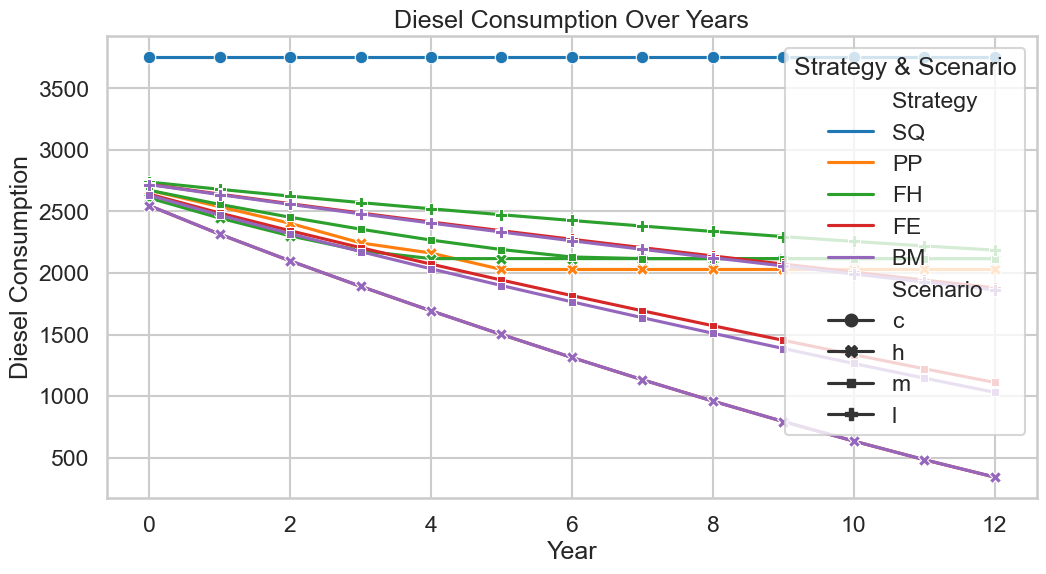

In [96]:
# Ensure that the data types are appropriate for plotting
final_df['Year'] = final_df['Year'].astype(int)
final_df['Result'] = final_df['Result'].astype(float)

# Create the line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_df, x='Year', y='Result', hue='Strategy', style='Scenario', markers=True, dashes=False)

# Add titles and labels
plt.title('Diesel Consumption Over Years')
plt.xlabel('Year')
plt.ylabel('Diesel Consumption')
plt.legend(title='Strategy & Scenario')

# Display the plot
plt.show()


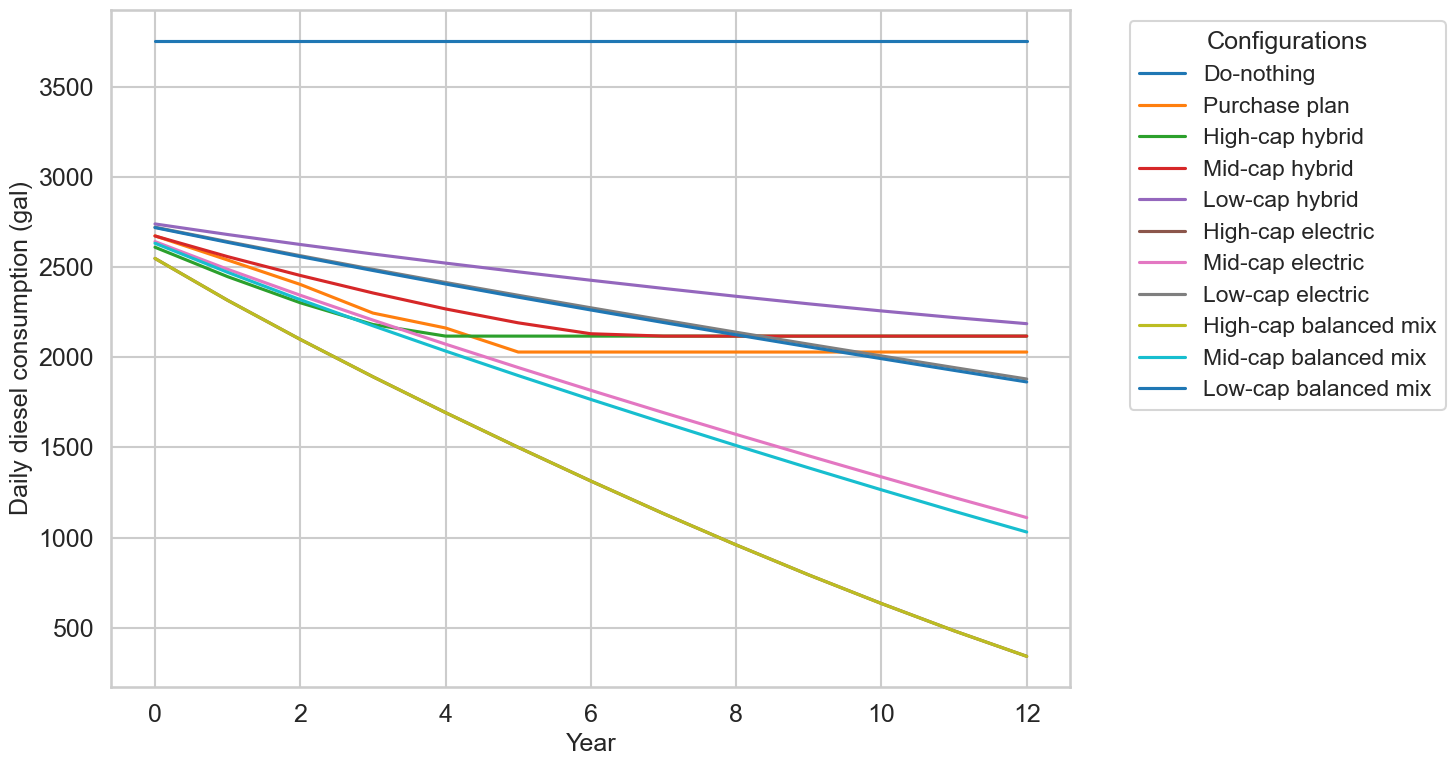

In [112]:
# Mapping combinations to desired names
mapping = {
    ('c', 'SQ'): 'Do-nothing',
    ('h', 'PP'): 'Purchase plan',
    ('l', 'FH'): 'Low-cap hybrid',
    ('m', 'FH'): 'Mid-cap hybrid',
    ('h', 'FH'): 'High-cap hybrid',
    ('l', 'FE'): 'Low-cap electric',
    ('m', 'FE'): 'Mid-cap electric',
    ('h', 'FE'): 'High-cap electric',
    ('l', 'BM'): 'Low-cap balanced mix',
    ('m', 'BM'): 'Mid-cap balanced mix',
    ('h', 'BM'): 'High-cap balanced mix'
}

final_df['Label'] = final_df.set_index(['Scenario', 'Strategy']).index.map(mapping.get).values

# Improve the plot
sns.set_style("whitegrid")
sns.set_context("talk")  # makes everything larger

plt.figure(figsize=(15, 8))
plot = sns.lineplot(data=final_df, x='Year', y='Result', hue='Label', markers=True, dashes=False, palette='tab10')

# Add titles and labels
#plt.title('Diesel Consumption Over Years', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Daily diesel consumption (gal)', fontsize=18)
plt.legend(title='Configurations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Save the plot
plt.tight_layout()
plt.savefig(r'../../figures/diesel-consumption.png', dpi=400)  

# Display the plot
plt.show()


In [98]:
# Group by 'Label' and sum 'Result'
summed_results = final_df.groupby('Label')['Result'].sum().reset_index()

# Find the sum of 'Result' for 'Do-nothing' label
do_nothing_value = summed_results[summed_results['Label'] == 'Do-nothing']['Result'].values[0]

# Compute % decrease relative to 'Do-nothing'
summed_results['% Decrease'] = 100 * (do_nothing_value - summed_results['Result']) / do_nothing_value

summed_results

,Label,Result,% Decrease
0,Do-nothing,48806.147957,0.000000
1,High-cap balanced mix,17701.441316,63.731124
2,High-cap electric,17701.552429,63.730896
3,High-cap hybrid,28589.949070,41.421419
4,Low-cap balanced mix,29547.769457,39.458919
5,Low-cap electric,29687.098230,39.173445
6,Low-cap hybrid,31713.387375,35.021737
7,Mid-cap balanced mix,23266.714170,52.328313
8,Mid-cap electric,23894.162775,51.042719
9,Mid-cap hybrid,29327.281006,39.910683


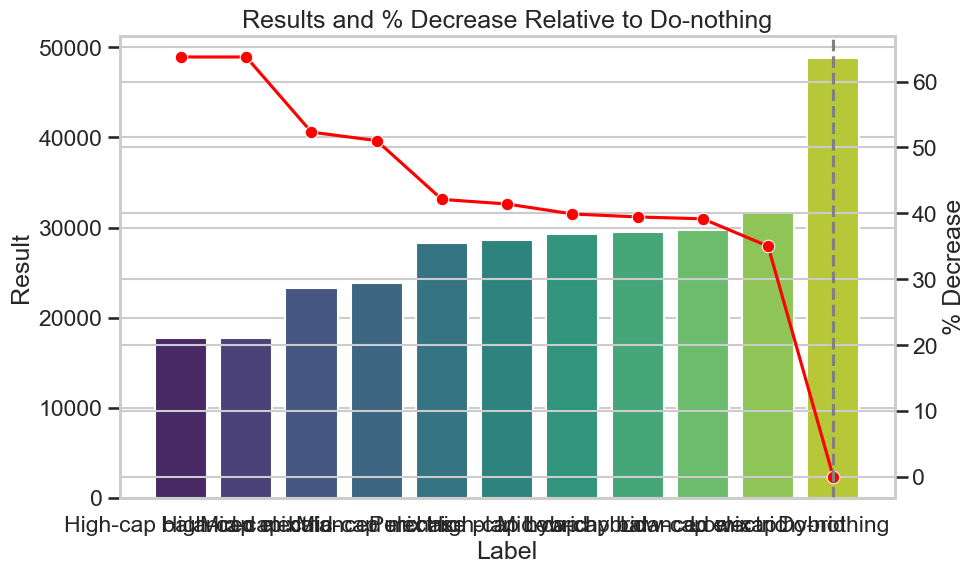

In [99]:
# Group by 'Label' and sum 'Result'
summed_results = final_df.groupby('Label')['Result'].sum().reset_index()

# Compute % decrease relative to 'Do-nothing'
do_nothing_value = summed_results[summed_results['Label'] == 'Do-nothing']['Result'].values[0]
summed_results['% Decrease'] = 100 * (do_nothing_value - summed_results['Result']) / do_nothing_value

# Order dataframe based on 'Result'
summed_results = summed_results.sort_values('Result')

# Plot
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x='Label', y='Result', data=summed_results, palette='viridis')

# Line plot for % Decrease
ax2 = plt.gca().twinx()
sns.lineplot(x='Label', y='% Decrease', data=summed_results, ax=ax2, color='red', marker="o")

# Highlight 'Do-nothing'
plt.axvline(x=summed_results['Label'].tolist().index('Do-nothing'), color='grey', linestyle='--')

# Legends and titles
plt.title('Results and % Decrease Relative to Do-nothing')
plt.gca().set(ylabel='% Decrease')
plt.show()

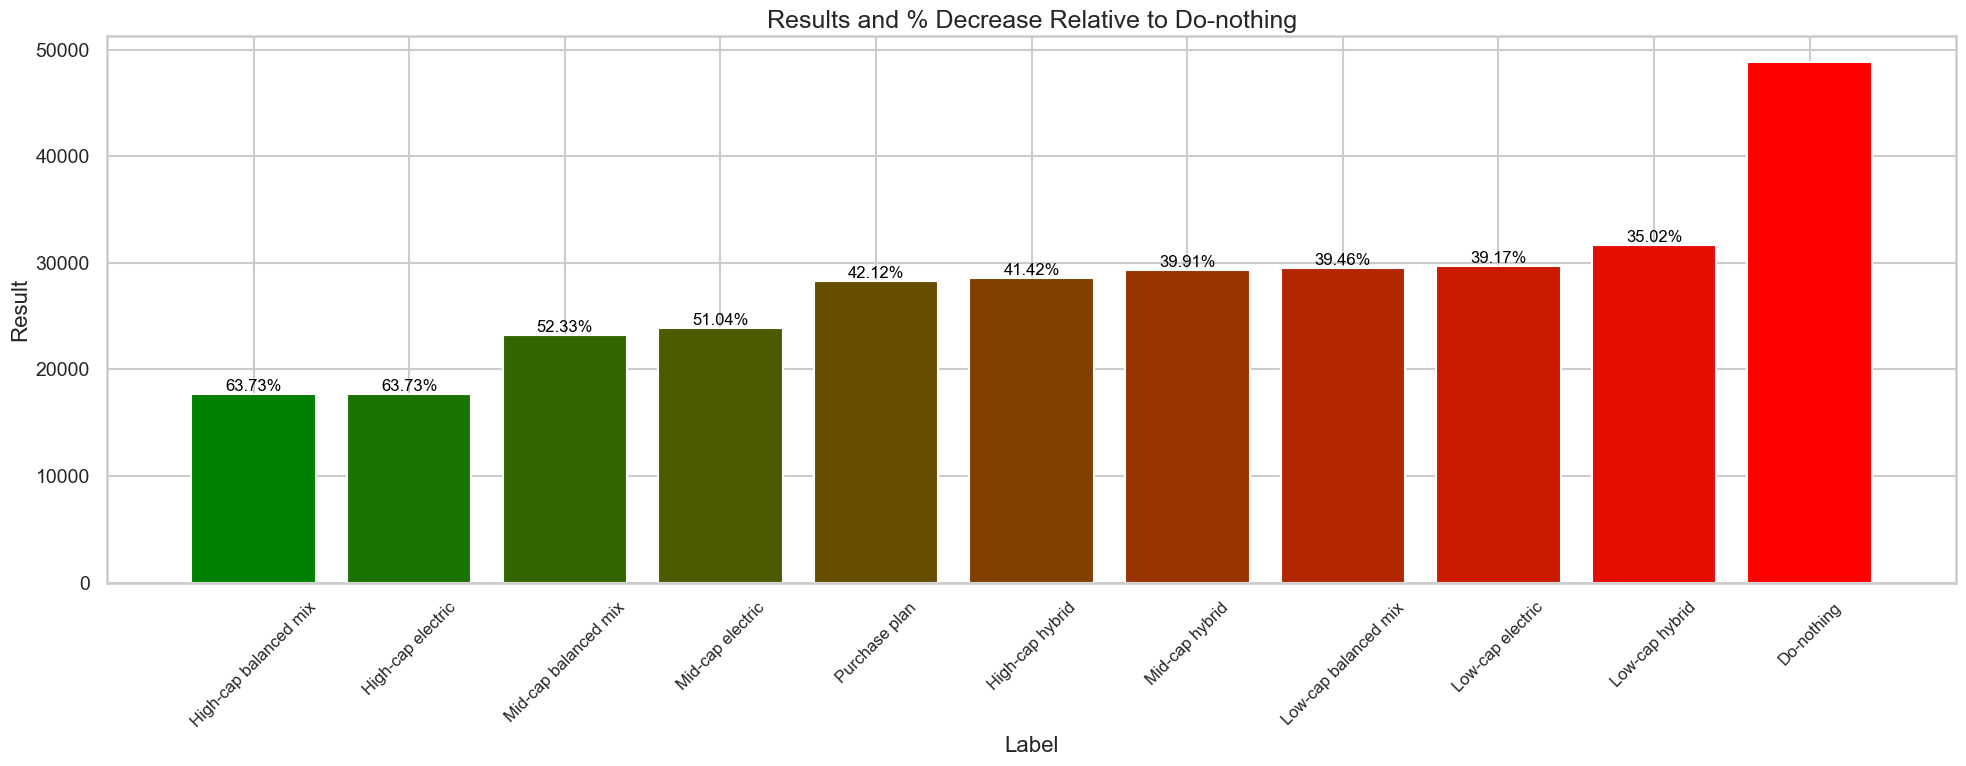

In [105]:
# Group by 'Label' and sum 'Result'
mean_results = final_df.groupby('Label')['Result'].sum().reset_index()

# Compute % decrease relative to 'Do-nothing'
do_nothing_value = mean_results[mean_results['Label'] == 'Do-nothing']['Result'].values[0]
mean_results['% Decrease'] = 100 * (do_nothing_value - mean_results['Result']) / do_nothing_value

# Order dataframe based on 'Result'
mean_results = mean_results.sort_values('Result')

# Create custom colormap
colors = ["green", "red"]  # Reversed the order for proper gradient
cmap = LinearSegmentedColormap.from_list('custom', colors, N=len(mean_results))

# Derive bar colors from colormap
bar_colors = [cmap(i) for i in np.linspace(0, 1, len(mean_results))]

# Plot
plt.figure(figsize=(20, 8))
bars = plt.bar(mean_results['Label'], mean_results['Result'], color=bar_colors)

# Annotations on top of each bar
for idx, rect in enumerate(bars):
    height = rect.get_height()
    if mean_results.iloc[idx]['Label'] != 'Do-nothing':
        plt.annotate(f"{mean_results.iloc[idx]['% Decrease']:.2f}%",
                     xy=(rect.get_x() + rect.get_width() / 2, height + 2),  # Adding a small offset on y for clarity
                     ha='center', va='bottom', fontsize=12, color='black')

# Style adjustments
plt.xticks(fontsize=12, rotation=45)  # Increased font size and rotated ticks by 45 degrees
plt.yticks(fontsize=14)
plt.xlabel('Label', fontsize=16)
plt.ylabel('Result', fontsize=16)
plt.title('Results and % Decrease Relative to Do-nothing', fontsize=18)
plt.tight_layout()
plt.show()


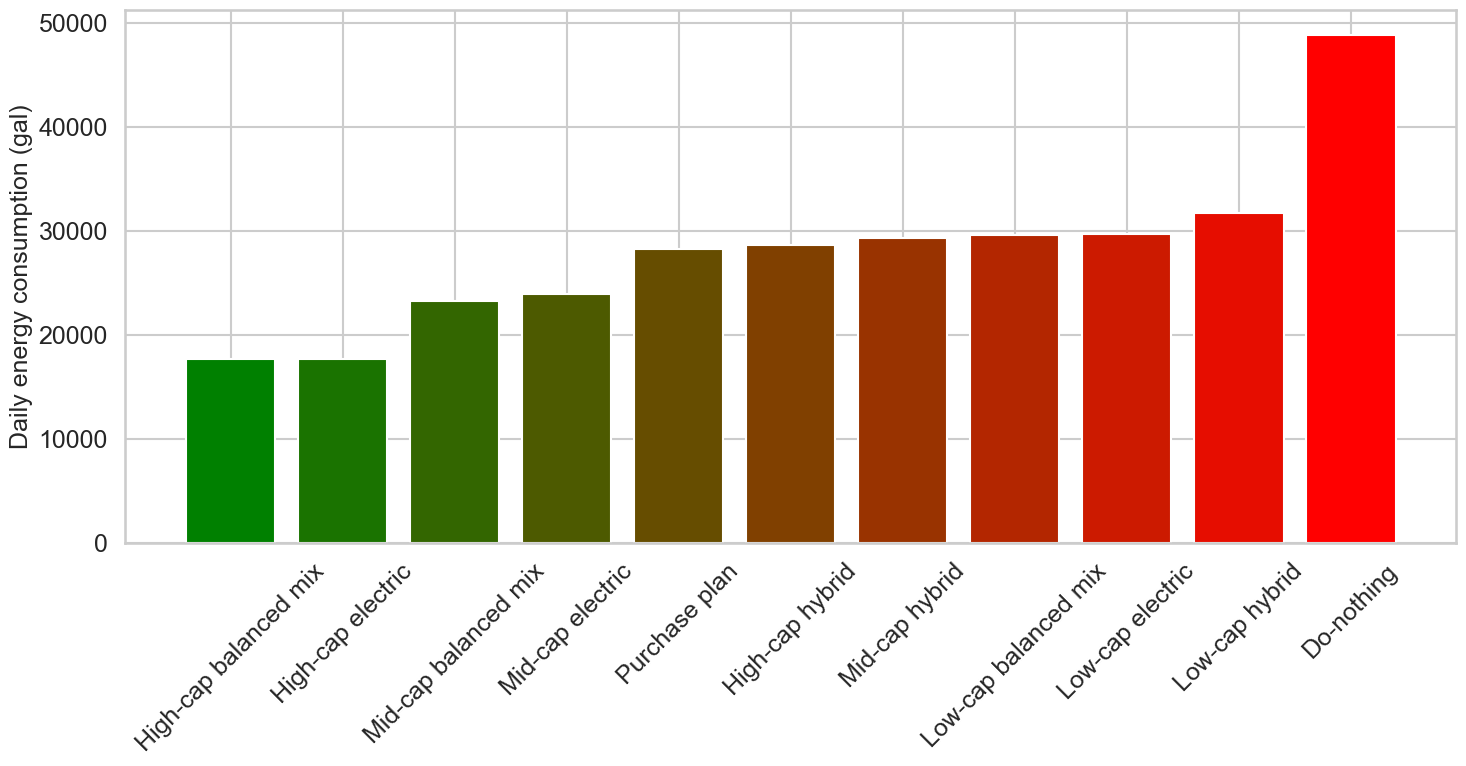

In [111]:
# Group by 'Label' and sum 'Result'
mean_results = final_df.groupby('Label')['Result'].sum().reset_index()

# Compute % decrease relative to 'Do-nothing'
do_nothing_value = mean_results[mean_results['Label'] == 'Do-nothing']['Result'].values[0]
mean_results['% Decrease'] = 100 * (do_nothing_value - mean_results['Result']) / do_nothing_value

# Order dataframe based on 'Result'
mean_results = mean_results.sort_values('Result')

# Create custom colormap
colors = ["green", "red"]  # Reversed the order for proper gradient
cmap = LinearSegmentedColormap.from_list('custom', colors, N=len(mean_results))

# Derive bar colors from colormap
bar_colors = [cmap(i) for i in np.linspace(0, 1, len(mean_results))]

# Plot
plt.figure(figsize=(15, 8))  # Increased size
bars = plt.bar(mean_results['Label'], mean_results['Result'], color=bar_colors)

# Style adjustments
plt.xticks(fontsize=18, rotation=45)  # Increased font size and rotated ticks by 45 degrees
plt.yticks(fontsize=18)  # Increased font size
#plt.xlabel('Label', fontsize=20)  # Increased font size
plt.ylabel('Daily energy consumption (gal)', fontsize=18)  # Increased font size
#plt.title('Results and % Decrease Relative to Do-nothing', fontsize=24)  # Increased font size
# Save the plot
plt.tight_layout()
plt.savefig(r'../../figures/mean-diesel-consumption.png', dpi=400)  
plt.show()


In [210]:
H_BM_energy = pd.read_csv(r'../../results/highcap-BM-energy-by-routes.csv', low_memory=False)

In [211]:
H_BM_energy = H_BM_energy.loc[H_BM_energy['Year']==12].copy()

In [212]:
H_BM_energy = H_BM_energy.loc[H_BM_energy['Value']==1].copy()

In [213]:
H_BM_energy = H_BM_energy.groupby('Route')['Coefficient'].sum().reset_index()

In [214]:
H_BM_energy = H_BM_energy.rename(columns={'Coefficient': 'Diesel'})

In [215]:
H_BM_energy.to_csv(r'../../results/highcap-balanced-mix-diesel.csv', index=False)

In [216]:
SQ_filtered['Diesel'] = np.where(SQ_filtered['Powertrain'] != 'electric', SQ_filtered['Energy'], 0)

In [217]:
SQ_filtered = SQ_filtered.groupby('Route')['Diesel'].sum().reset_index()

In [218]:
SQ_filtered.to_csv(r'../../results/do-nothing-diesel.csv', index=False)

In [219]:
SQ_filtered['Diesel'].sum()

3754.3190736247534

In [220]:
H_BM_energy['Diesel'].sum()

341.481417981